# Event Driven Trading System

Main notebook for testing and documenting component usage for my own reference. Created with reference to Successful Algorithmic Trading (Michael Halls Moore).

## Imports and setting up db connection

In [1]:
import yfinance as yf
import pandas as pd
import sqlite3

from data import DataSource, EODDataHandler

ds = DataSource()

symbols = ["SPY", "IEF", "TLT", "GLD", "VNQ"]

## EOD DataHandler implementation via DataSource abstraction layer
DataHandler responsible for actually creating the mechanism that mimics a live event-driven system using historical data. 

In [2]:
from collections import deque

dataHandler = EODDataHandler(deque(), symbols, "2019-12-01", "2020-01-01")

In [7]:
# Run this cell a few times to get a few rounds of 'data feed updates'
dataHandler.updateBars()

In [9]:
dataHandler.getLatestBarsValues("SPY", 'adj_close', 3)

array([308.1243, 308.6783, 311.4978])

## Update db data

In [2]:
ds.updateEodData()

[*********************100%***********************]  1 of 1 completed
AXP is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
BA is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
CAT is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
CVX is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
DIS is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
DOW is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
GLD is already up to date (latest date: 2020-06-19)
[*********************100%***********************]  1 of 1 completed
GS is already up to date (latest date: 2020-06-19)
[*********************100%********

## Reading data from the db

In [2]:
spy = ds.getEodData("SPY", start="2019-12-01", end="2020-01-01")
spy

,open,high,low,close,adj_close,volume
date,,,,,,
2019-12-02,314.59,314.66,311.17,311.64,308.3024,75767800
2019-12-03,308.65,309.64,307.13,309.55,306.2348,73941700
2019-12-04,310.70,312.12,310.32,311.46,308.1243,49080000
2019-12-05,312.23,312.25,310.58,312.02,308.6783,40709000
2019-12-06,314.12,315.31,314.11,314.87,311.4978,48927000
2019-12-09,314.44,315.18,313.80,313.88,310.5184,34838500
2019-12-10,313.82,314.55,312.81,313.53,310.1722,52649800
2019-12-11,314.03,314.70,313.44,314.42,311.0526,53429100
2019-12-12,314.43,317.99,314.17,317.13,313.7336,96389600


## Web scraping

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find(id="constituents")
headers = list(map(lambda x: x.get_text(strip=True), table.find_all("th")))
table_rows = table.find("tbody").find_all("tr")

temp = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.get_text(strip=True) for tr in td]
    temp.append(row)

df = pd.DataFrame(temp[1:], columns=headers)
df



,Company,Exchange,Symbol,Industry,Date Added,Notes,"Index Weighting (Apr 30, 2020)"
0,3M,NYSE,NYSE:MMM,Conglomerate,1976-08-09,as Minnesota Mining and Manufacturing,4.35%
1,American Express,NYSE,NYSE:AXP,Financial services,1982-08-30,,2.68%
2,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,,8.01%
3,Boeing,NYSE,NYSE:BA,Aerospaceanddefense,1987-03-12,,3.87%
4,Caterpillar Inc.,NYSE,NYSE:CAT,ConstructionandMining,1991-05-06,,3.34%
5,Chevron Corporation,NYSE,NYSE:CVX,Petroleum industry,2008-02-19,also 1930-07-18 to 1999-11-01,2.63%
6,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,,1.21%
7,The Coca-Cola Company,NYSE,NYSE:KO,Food industry,1987-03-12,also 1932-05-26 to 1935-11-20,1.31%
8,Dow Inc.,NYSE,NYSE:DOW,Chemical industry,2019-04-02,,1.04%
9,ExxonMobil,NYSE,NYSE:XOM,Petroleum industry,1928-10-01,asStandard Oil of New Jersey,1.32%


## Formatting data to put into database

In [29]:
extraColumns = list(filter(lambda x: x not in ["Company", "Exchange", "Symbol"], headers))

df.drop(labels=extraColumns, axis=1, inplace=True)

df['Symbol'] = df['Symbol'].apply(lambda x: x[x.find(":") + 1:])
df['Exchange'] = df['Exchange'].apply(lambda x: data.getExchangeId(x))

df.rename(
    columns={
        "Exchange": "exchange_id",
        "Symbol": "symbol",
        "Company": "name"
    },
    inplace=True)

df.insert(loc=len(df.columns), column="currency", value="USD")
df.insert(loc=len(df.columns), column="instrument", value="Stock")

df

,name,exchange_id,symbol,currency,instrument
0,3M,2,MMM,USD,Stock
1,American Express,2,AXP,USD,Stock
2,Apple Inc.,3,AAPL,USD,Stock
3,Boeing,2,BA,USD,Stock
4,Caterpillar Inc.,2,CAT,USD,Stock
5,Chevron Corporation,2,CVX,USD,Stock
6,Cisco Systems,3,CSCO,USD,Stock
7,The Coca-Cola Company,2,KO,USD,Stock
8,Dow Inc.,2,DOW,USD,Stock
9,ExxonMobil,2,XOM,USD,Stock


In [1]:
# df.to_sql('assets', ds.con, index=False, if_exists="append")

## Performance metrics

In [2]:
from performance import CAGR, annualVolatility, sharpeRatio, maxDrawdown

spy = ds.getEodData('SPY')
returns = spy['adj_close'].pct_change().dropna()

In [3]:
CAGR(returns)

0.09472859969858205

In [4]:
annualVolatility(returns)

0.1893144250464249

In [5]:
sharpeRatio(returns)

0.5003770825987089

In [14]:
value = returns.add(1.0).cumprod()
(value / value.cummax()).min()

0.4481053003293936

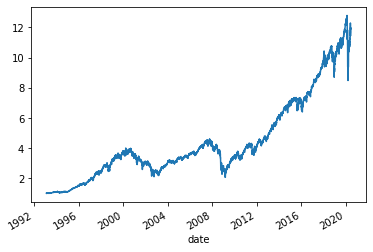

In [15]:
value.plot()